# MixIn を用いて，線形関数と対数関数のあてはめを簡潔に実装

In [1]:
from __future__ import (
    print_function,
    division,
    absolute_import,
    unicode_literals)

パッケージのimport

In [2]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.base import BaseEstimator, RegressorMixin
import matplotlib.pyplot as plt
%matplotlib inline

対数関数

In [3]:
class LogFuncMixin(object):
    def func(self, x, a, b):
        return a * np.log(x) + b

線形関数

In [4]:
class LinearFuncMixin(object):
    def func(self, x, a, b):
        return a * x + b

関数のあてはめと予測

In [5]:
class FuncFitMixin(object):
    def fit(self, x, y):
        popt, pcov = curve_fit(self.func, x, y)
        self.coef_ = popt
    
    def predict(self, x):
        return self.func(x, *self.coef_)

対数関数へのあてはめ

In [6]:
class LogFit(BaseEstimator, RegressorMixin,
             LogFuncMixin, FuncFitMixin):
    pass

線形関数へのあてはめ

In [7]:
class LinearFit(BaseEstimator, RegressorMixin,
                LinearFuncMixin, FuncFitMixin):
    pass

テストデータの作成：\\(y = 2\\,\\log(x) + 10 + \\epsilon\\)

In [8]:
x = np.linspace(0.1, 2.0, 100)
y = 2.0 * np.log(x) + 10 + np.random.normal(0, 0.2, 100)

clf1 では対数関数に，clf2 では線形関数にあてはめ

In [9]:
clf1 = LogFit()
clf1.fit(x, y)
clf2 = LinearFit()
clf2.fit(x,y)

赤は対数関数によるあてはめ，青は線形関数によるあてはめ

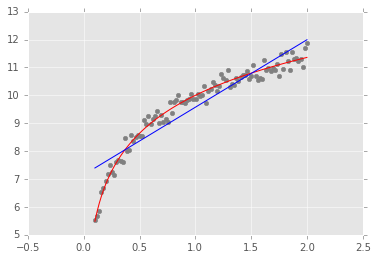

In [10]:
plt.scatter(x, y, color='gray')
plt.plot(x, clf1.predict(x), color='red')
plt.plot(x, clf2.predict(x), color='blue')